In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 20, 6

In [3]:
data = pd.read_csv('/national-population.csv')
data.head()

,realtime_end,realtime_start,value,date
0,2019-04-05,2019-04-05,76094000,1900-01-01
1,2019-04-05,2019-04-05,77584000,1901-01-01
2,2019-04-05,2019-04-05,79163000,1902-01-01
3,2019-04-05,2019-04-05,80632000,1903-01-01
4,2019-04-05,2019-04-05,82166000,1904-01-01


In [74]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/national-population.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)

data.head()

,realtime_end,realtime_start,value
date,,,
1900-01-01,2019-04-05,2019-04-05,76094000
1901-01-01,2019-04-05,2019-04-05,77584000
1902-01-01,2019-04-05,2019-04-05,79163000
1903-01-01,2019-04-05,2019-04-05,80632000
1904-01-01,2019-04-05,2019-04-05,82166000


In [75]:
data.drop(['realtime_end','realtime_start'],axis=1,inplace=True)
data.head(3)

,value
date,
1900-01-01,76094000
1901-01-01,77584000
1902-01-01,79163000


In [76]:
ts = data['value']
ts.head()

date
1900-01-01    76094000
1901-01-01    77584000
1902-01-01    79163000
1903-01-01    80632000
1904-01-01    82166000
Name: value, dtype: int64

In [77]:
from datetime import datetime
ts[datetime(1900,1,1)]

76094000

In [78]:
ts['1959']

date
1959-01-01    177829628
Name: value, dtype: int64

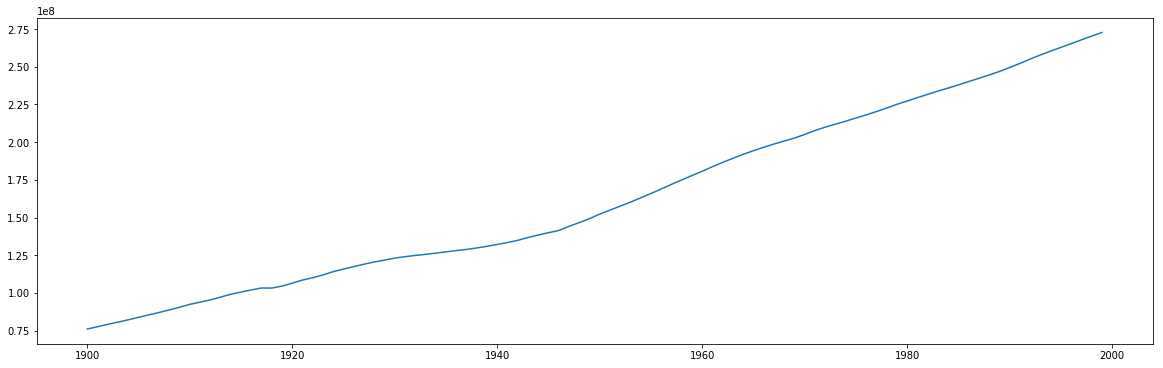

In [79]:
plt.plot(ts)

In [80]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    moving_avg = timeseries.rolling(12).mean()
    original = plt.plot(timeseries, 'b', label='Original')
    mean = plt.plot(moving_avg, 'r', label='Rolling Mean')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean/Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic:','p-value','#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value {}'.format(key)] = value
        
    print(dfoutput)

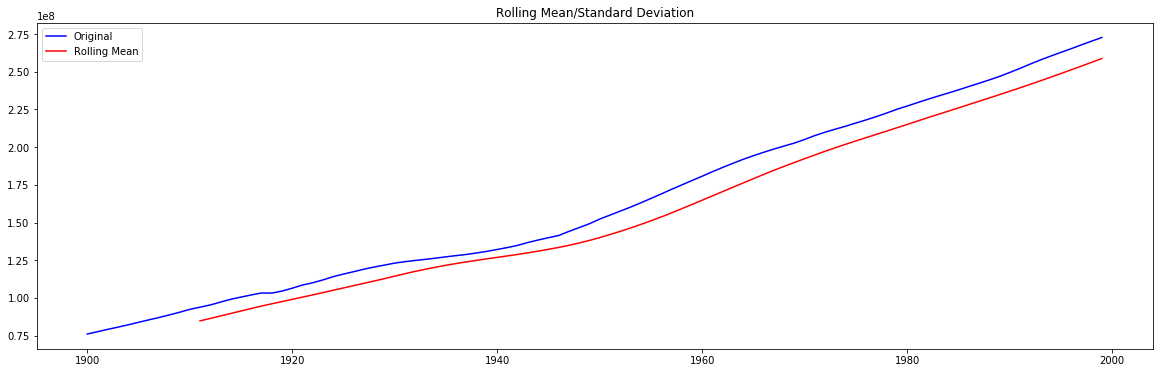

Dickey-Fuller Test
Test Statistic:                 1.597977
p-value                         0.997851
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value 1%              -3.498910
Critical Value 5%              -2.891516
Critical Value 10%             -2.582760
dtype: float64


In [81]:
test_stationarity(ts)

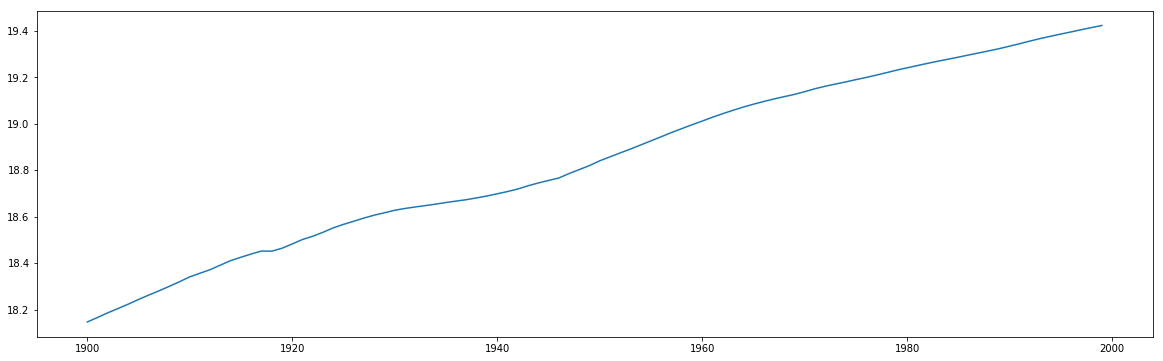

In [82]:
ts_log = np.log(ts)
plt.plot(ts_log)

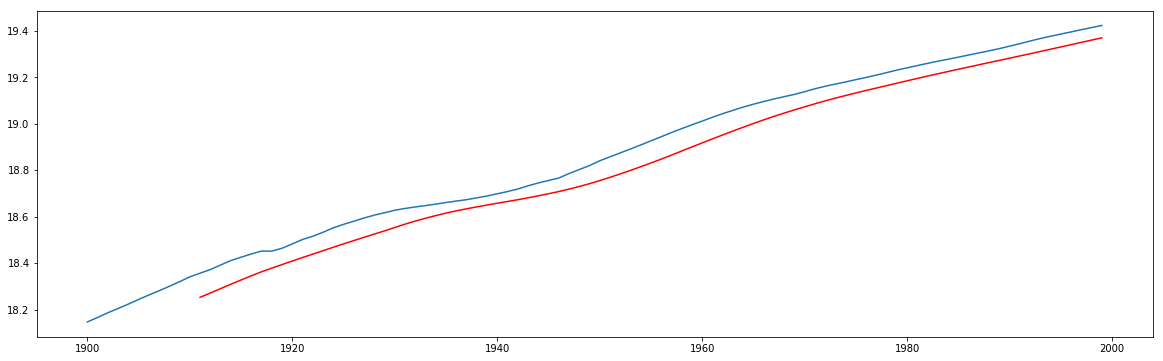

In [83]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, 'r')

In [84]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
1900-01-01        NaN
1901-01-01        NaN
1902-01-01        NaN
1903-01-01        NaN
1904-01-01        NaN
1905-01-01        NaN
1906-01-01        NaN
1907-01-01        NaN
1908-01-01        NaN
1909-01-01        NaN
1910-01-01        NaN
1911-01-01    0.10394
Name: value, dtype: float64

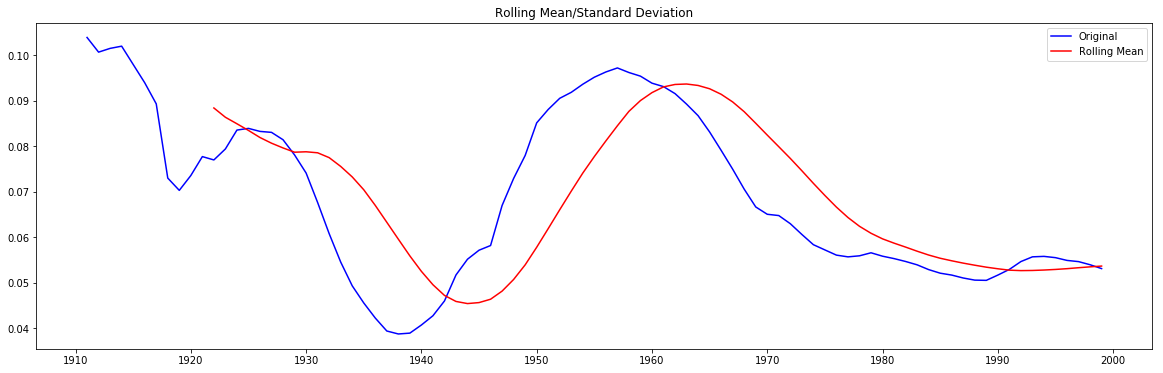

Dickey-Fuller Test
Test Statistic:                -3.069038
p-value                         0.028931
#Lags Used                      3.000000
Number of Observations Used    85.000000
Critical Value 1%              -3.509736
Critical Value 5%              -2.896195
Critical Value 10%             -2.585258
dtype: float64


In [85]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

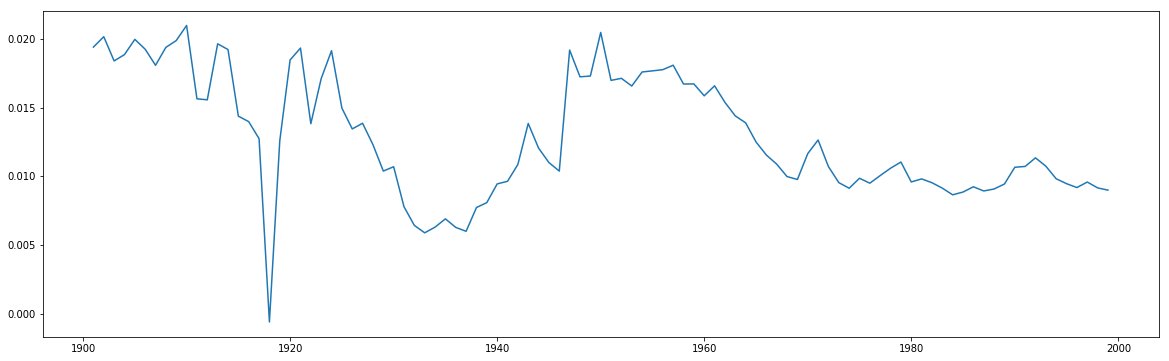

In [86]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

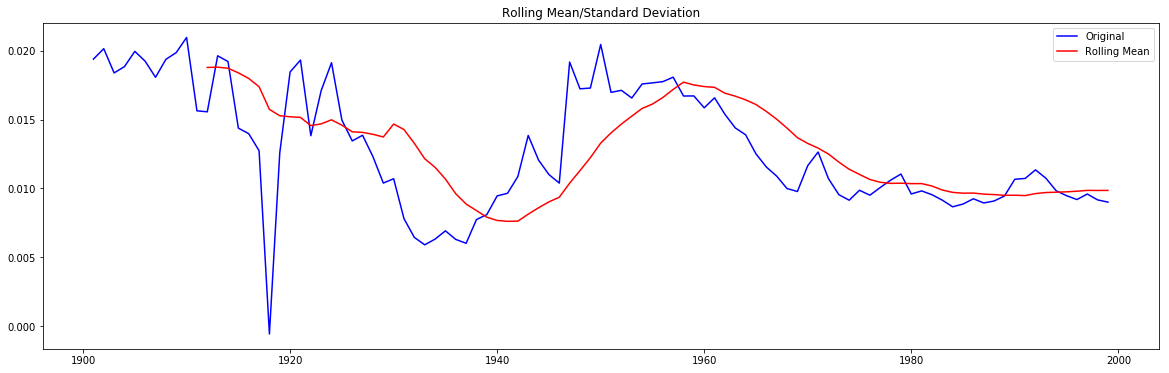

Dickey-Fuller Test
Test Statistic:                -3.272917
p-value                         0.016133
#Lags Used                      0.000000
Number of Observations Used    98.000000
Critical Value 1%              -3.498910
Critical Value 5%              -2.891516
Critical Value 10%             -2.582760
dtype: float64


In [87]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

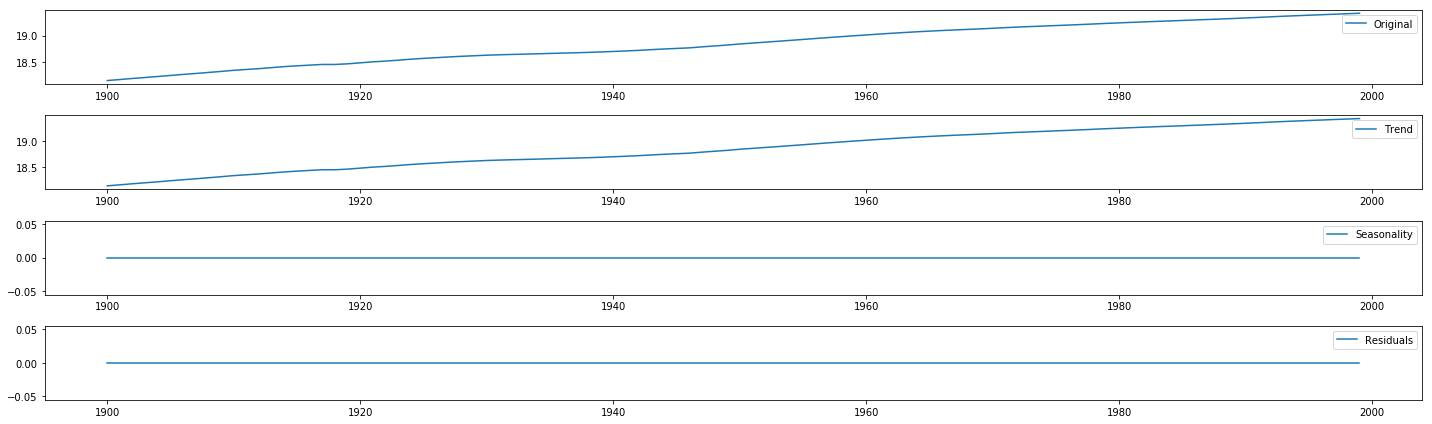

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

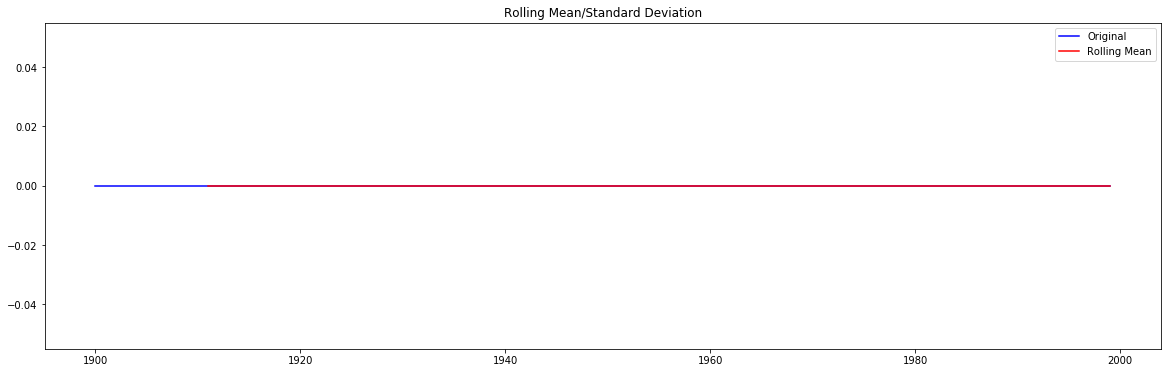

Dickey-Fuller Test
Test Statistic:                      NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value 1%              -3.498198
Critical Value 5%              -2.891208
Critical Value 10%             -2.582596
dtype: float64


C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: inva

In [89]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## ARIMA

In [90]:
from statsmodels.tsa.stattools import acf, pacf

In [91]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

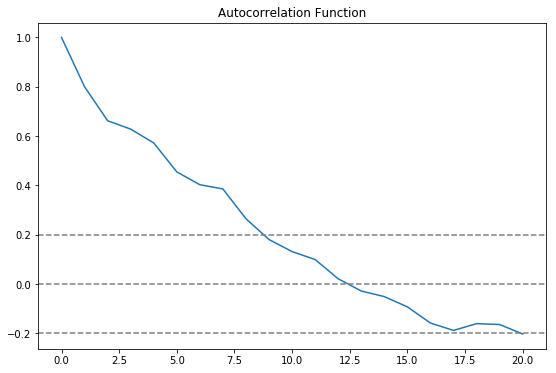

In [92]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

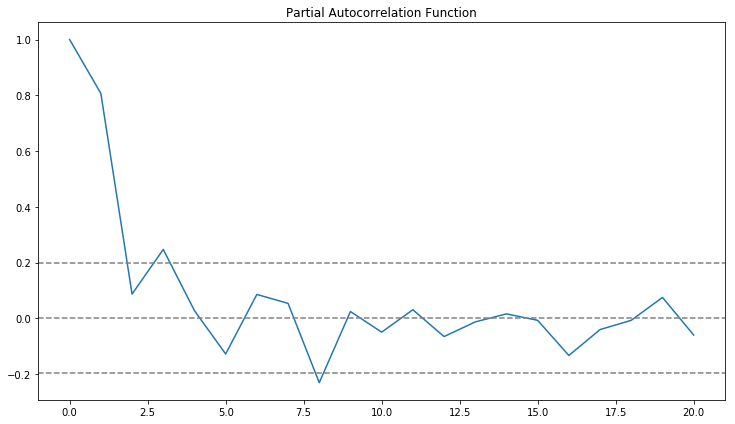

In [93]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [94]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0006676798625925557')

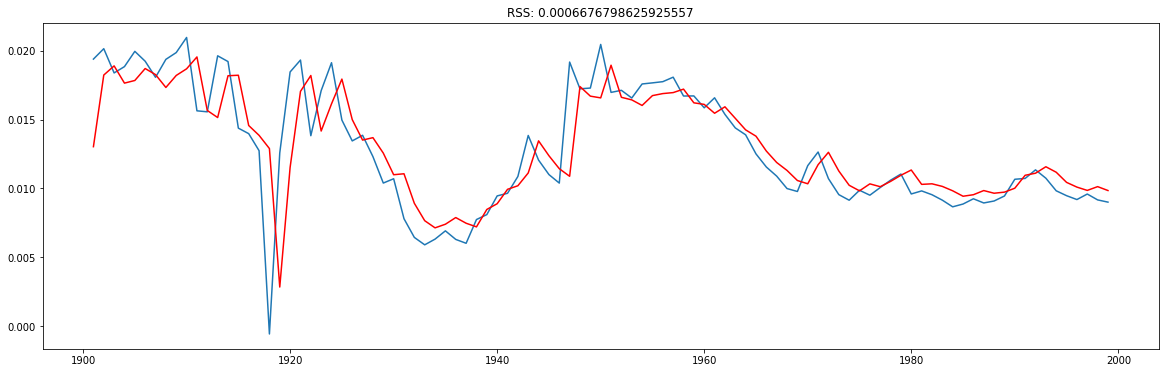

In [95]:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, 'r')
plt.title('RSS: {}'.format(sum((results_AR.fittedvalues-ts_log_diff)**2)))

C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 3.396071848399271e-08')

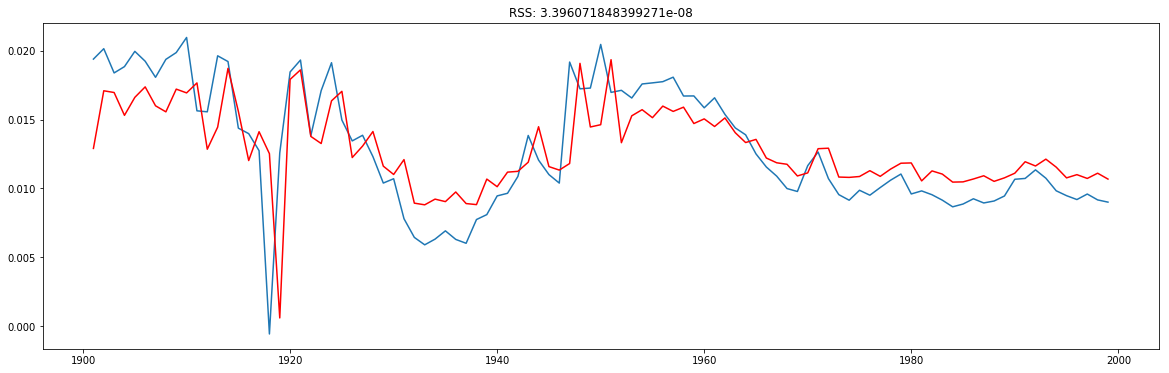

In [96]:
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, 'r')
plt.title('RSS: {}'.format(sum(results_MA.fittedvalues-ts_log_diff)**2))

In [97]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 439.232
Method:                       css-mle   S.D. of innovations              0.003
Date:                Fri, 12 Jul 2019   AIC                           -870.464
Time:                        10:51:02   BIC                           -860.083
Sample:                    01-01-1901   HQIC                          -866.264
                         - 01-01-1999                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0129      0.001     19.475      0.000       0.012       0.014
ma.L1.D.value     0.8943      0.093      9.657      0.000       0.713       1.076
ma.L2.D.value     0.4356      0.090      4.859      0.000       0.260       0.611
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0264           -1.1145j            1.5151           -0.3685
MA.2           -1.0264           +1.1145j            1.5151            0.3685
-----------------------------------------------------------------------------
"""

C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.00010770712319861601')

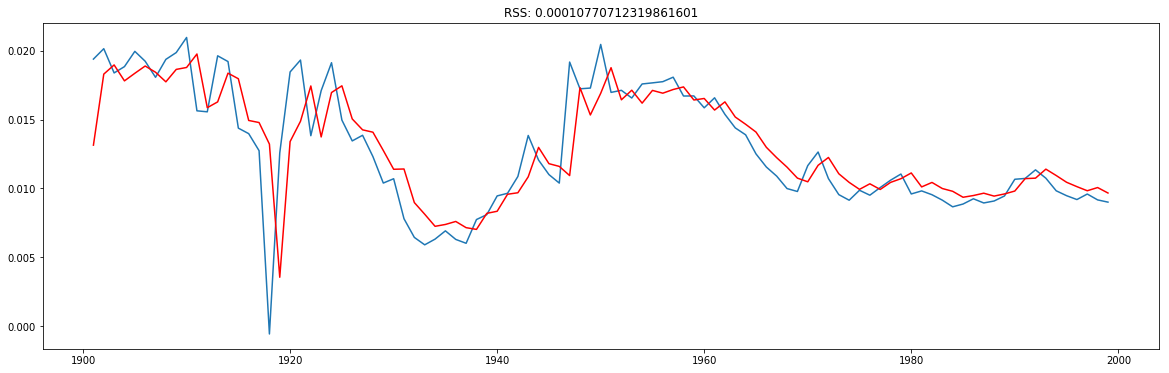

In [98]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, 'r')
plt.title('RSS: {}'.format(sum(results_ARIMA.fittedvalues-ts_log_diff)**2))

In [99]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 452.685
Method:                       css-mle   S.D. of innovations              0.002
Date:                Fri, 12 Jul 2019   AIC                           -893.370
Time:                        10:51:02   BIC                           -877.800
Sample:                    01-01-1901   HQIC                          -887.070
                         - 01-01-1999                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0131      0.002      6.980      0.000       0.009       0.017
ar.L1.D.value     0.7311      0.388      1.886      0.062      -0.029       1.491
ar.L2.D.value     0.1762      0.347      0.508      0.613      -0.504       0.857
ma.L1.D.value    -0.0030      0.372     -0.008      0.994      -0.733       0.727
ma.L2.D.value    -0.2259      0.119     -1.895      0.061      -0.460       0.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0844           +0.0000j            1.0844            0.0000
AR.2           -5.2337           +0.0000j            5.2337            0.5000
MA.1            2.0971           +0.0000j            2.0971            0.0000
MA.2           -2.1104           +0.0000j            2.1104            0.5000
-----------------------------------------------------------------------------
"""

In [100]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
1901-01-01    0.013139
1902-01-01    0.018300
1903-01-01    0.018967
1904-01-01    0.017809
1905-01-01    0.018361
dtype: float64

In [101]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
1901-01-01    0.013139
1902-01-01    0.031438
1903-01-01    0.050405
1904-01-01    0.068215
1905-01-01    0.086576
dtype: float64

In [102]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
1900-01-01    18.147480
1901-01-01    18.160619
1902-01-01    18.178918
1903-01-01    18.197885
1904-01-01    18.215695
dtype: float64

Text(0.5, 1.0, 'RMSE: 1231401.6116079062')

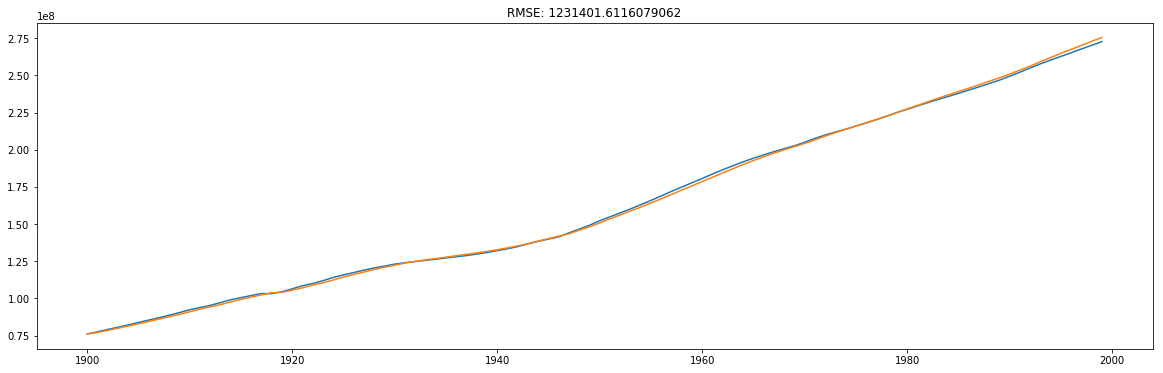

In [103]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: {}'.format(np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts))))

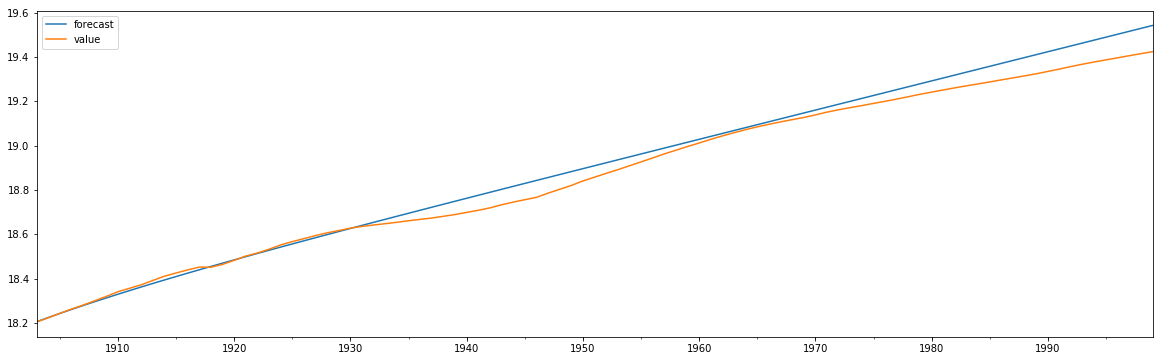

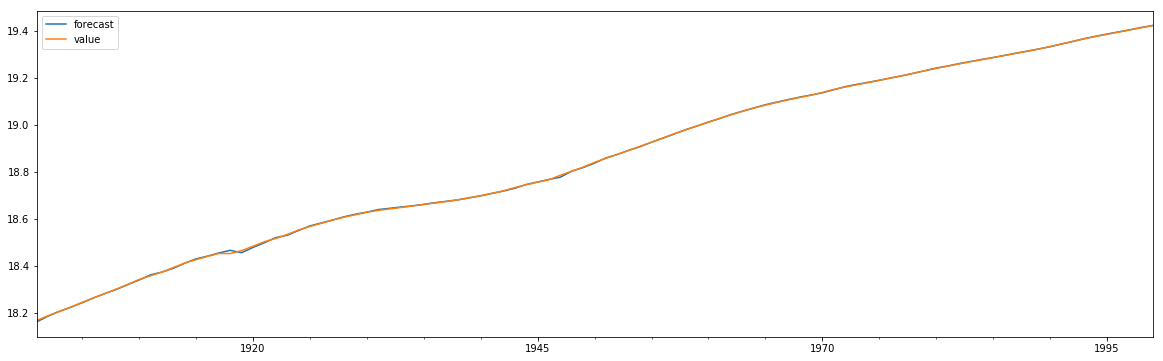

In [104]:
results_ARIMA.plot_predict(dynamic=True)
results_ARIMA.plot_predict(dynamic=False)

plt.show()

In [105]:
from statsmodels.tsa.stattools import acf

In [106]:
train = ts.iloc[:85]
test = ts.iloc[85:]

In [107]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [108]:
fc, se, conf = fitted.forecast(15, alpha=0.05)

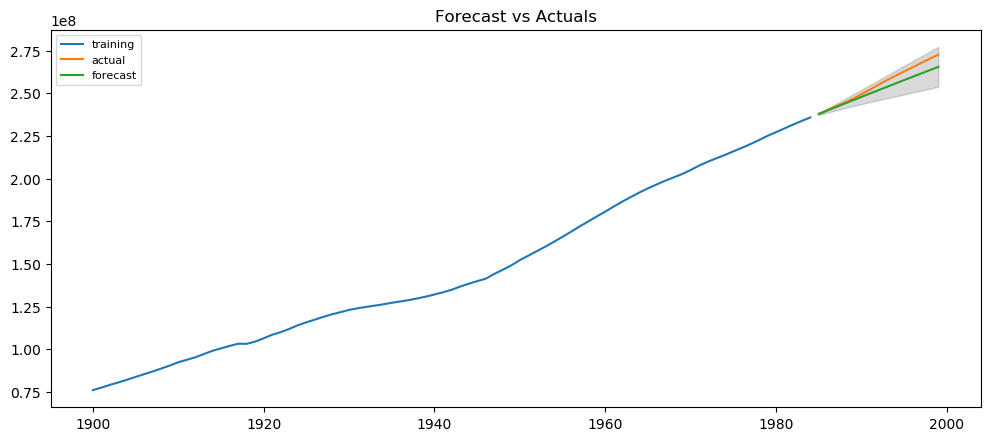

In [109]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#forecast in the right direction, just no seasonality

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 0)   Log Likelihood               -1169.865
Method:                       css-mle   S.D. of innovations         319597.874
Date:                Fri, 12 Jul 2019   AIC                           2349.729
Time:                        10:51:03   BIC                           2361.823
Sample:                    01-01-1902   HQIC                          2354.588
                         - 01-01-1984                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6541.0602   2.34e+04      0.280      0.780   -3.92e+04    5.23e+04
ar.L1.D2.value    -0.2124      0.109     -1.940      0.056      -0.427       0.002
ar.L2.D2.value    -0.2628      0.107

C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\HARENB\AppData\Local\Continuum\anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


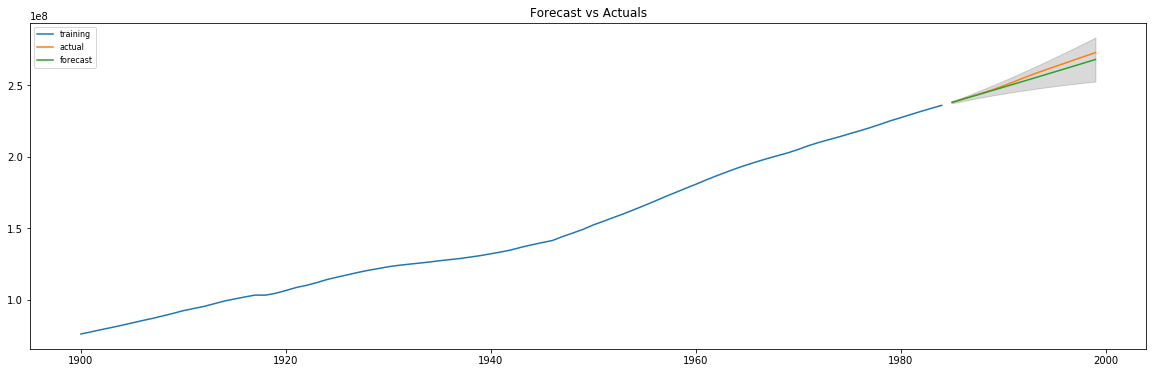

In [110]:
ts.dropna(inplace=True)
# Build Model
model = ARIMA(train, order=(3, 2, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## More Accurate Forecasting

In [111]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.008416203387437678,
 'me': -2215877.3473793687,
 'mae': 2215877.3473793687,
 'mpe': -0.008416203387437678,
 'rmse': 2813642.9517022055,
 'acf1': 0.8468138631932554,
 'corr': 0.9996264118177771,
 'minmax': 0.008416203387437537}

In [1]:
data.head(2)

NameError: name 'data' is not defined

In [113]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = data
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=2760.485, BIC=2770.825, Fit time=0.050 seconds
Fit ARIMA: order=(0, 2, 0); AIC=2762.464, BIC=2767.634, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=2762.196, BIC=2769.951, Fit time=0.012 seconds
Fit ARIMA: order=(0, 2, 1); AIC=2760.401, BIC=2768.156, Fit time=0.013 seconds
Fit ARIMA: order=(0, 2, 2); AIC=2758.933, BIC=2769.273, Fit time=0.025 seconds
Fit ARIMA: order=(1, 2, 3); AIC=2762.600, BIC=2778.109, Fit time=0.097 seconds
Fit ARIMA: order=(1, 2, 2); AIC=2760.805, BIC=2773.730, Fit time=0.067 seconds
Fit ARIMA: order=(0, 2, 3); AIC=2760.691, BIC=2773.615, Fit time=0.043 seconds
Total fit time: 0.315 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   98
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -1375.466
Method:                       css-mle   S.D. of innovations         301286.149
Date:                F

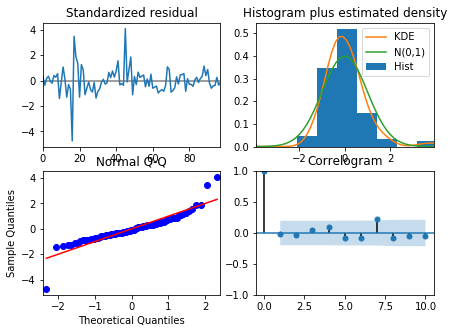

In [114]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [4]:
# Forecast
# n_periods = 12
# fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# # make series for plotting purpose
# fc_series = pd.Series(fc, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(df.value)
# plt.plot(fc_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("Final Forecast of Num. Passengers")
# plt.show()

In [3]:
# # Import
# # Plot
# fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# # Usual Differencing
# axes[0].plot(data[:], label='Original Series')
# axes[0].plot(data[:].diff(1), label='Usual Differencing')
# axes[0].set_title('Usual Differencing')
# axes[0].legend(loc='upper left', fontsize=10)


# # Seasinal Dei
# axes[1].plot(data[:], label='Original Series')
# axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
# axes[1].set_title('Seasonal Differencing')
# plt.legend(loc='upper left', fontsize=10)
# plt.suptitle('Passengers', fontsize=16)
# plt.show()

In [46]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.252 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.194 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.237 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.142, BIC=1035.518, Fit time=0.509 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1016.963, BIC=1034.214, Fit time=1.279 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.375, BIC=1047.751, Fit time=1.308 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.095, BIC=1038.221, Fit time=1.648 seconds
Fit ARIMA: order=(1, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -502.482
Date:                            Fri, 12 Jul 2019   AIC                           1016.963
Time:                                    10:38:31   BIC                           1034.214
Sample:                                         0   HQIC                          1023.973
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0057      0.179      0.032      0.975      -0.345       0.356
ar.L1         -0.3769      0.077     -4.901      0.000      -0.528      -0.226
ar.S.L12       0.6881      0.140      4.898      0.000       0.413       0.963
ar.S.L24       0.3097      0.107      2.896      0.004       0.100       0.519
ma.S.L12      -0.9708      0.461     -2.107      0.035      -1.874      -0.068
sigma2       113.3200     43.250      2.620      0.009      28.552     198.088
===================================================================================
Ljung-Box (Q):                       58.65   Jarque-Bera (JB):                12.09
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2]:
#change n_periods to predict different number of months

# n_periods = 96
# fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# # make series for plotting purpose
# fitted_series = pd.Series(fitted, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(data)
# plt.plot(fitted_series, 'r--')
# plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

# plt.title("Number of Passengers Forecast")
# plt.show()